**Author:** KHALYL Ossama 

**Description:** 

This notebook demonstrates the Transaction amount prediction for different Clients(Id_compte) by date using Support Vector Regression (SVR).

**Outline:**

1. [Libraries and settings](#1-bullet)
2. [Retrieving data and conducting a brief analysis](#2-bullet)  
3. [Manipulating the data](#3-bullet)
4. [Feature Engineering and Variable Transformation](#4-bullet)
5. [Model Training](#5-bullet)
6. [Predictions](#6-bullet)

**References:**  

[Exploratory Data Analysis for Machine Learning course from **IBM** ]

[My Basic Data cleansing project in github **https://github.com/User-ai327/Basic_Data_cleansing** ]

# 1. Libraries and settings <a class="anchor" id="1-bullet"></a> 

In [1]:
import warnings 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt
import random
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from sklearn.svm import SVR
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Set the seed for the random module
random.seed(42)

# Set the seed for NumPy
np.random.seed(42)


# 2. Retrieving data and conducting a brief analysis <a class="anchor" id="2-bullet"></a> 

In [2]:
# Load in the data
Transaction = pd.read_csv('train_test_data.csv')
# Shows first 20 lines of our data
Transaction.head(20)

,Date,Id_compte,amount_transaction,category_transaction
0,2022-01-01 00:23:00,SEWC_CL.1,462.96,Food & Drink - Groceries
1,2022-01-01 00:26:00,SEW0C_LI.1,15.51,General Services - Home Repair + Maintenance
2,2022-01-01 01:01:00,US.1,2.24,Bank Transfers - ATM withdrawals
3,2022-01-01 01:21:00,TA.1,2.86,Transportation - Public Transport
4,2022-01-01 01:54:00,US.1,1.68,Bank Transfers - ATM withdrawals
5,2022-01-01 01:55:00,HP.1,2.93,Transportation - Public Transport
6,2022-01-01 02:22:00,CPA_MP.1,5.86,Bank Transfers - ATM fees
7,2022-01-01 02:56:00,SEW0C_HI.1,7.47,Food & Drink - Coffee and tea
8,2022-01-01 03:33:00,HP.1,5.85,Transportation - Public Transport
9,2022-01-01 03:40:00,CPA_MP.1,703.44,Subscription - Others


In [3]:
# Display information about the Transaction DataFrame, including data types and memory usage
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20411 entries, 0 to 20410
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  20411 non-null  object 
 1   Id_compte             20411 non-null  object 
 2   amount_transaction    20411 non-null  float64
 3   category_transaction  20411 non-null  object 
dtypes: float64(1), object(3)
memory usage: 638.0+ KB


In [4]:
# Count the number of unique values in the 'Id_compte' column
Transaction['Id_compte'].unique().shape[0]

12

In [5]:
# Count the number of unique values in the 'category_transaction' column
unique_values = Transaction['category_transaction'].unique()

print(f'The number of unique values in the column category_transaction : {unique_values.shape[0]}')

The number of unique values in the column category_transaction : 68


# 3. Manipulating the data<a class="anchor" id="3-bullet"></a> 

In [6]:
# Handling Missing Values
total = Transaction.isnull().sum().sort_values(ascending=False)
print(f"number of missing values : \n {total}")

number of missing values : 
 Date                    0
Id_compte               0
amount_transaction      0
category_transaction    0
dtype: int64


In [7]:
# Create a copy of the DataFrame to avoid modifying the original data
Daily_Summary = Transaction.copy()

In [8]:
Daily_Summary['category_transaction'].head(20)

0                         Food & Drink - Groceries
1     General Services - Home Repair + Maintenance
2                 Bank Transfers - ATM withdrawals
3                Transportation - Public Transport
4                 Bank Transfers - ATM withdrawals
5                Transportation - Public Transport
6                        Bank Transfers - ATM fees
7                    Food & Drink - Coffee and tea
8                Transportation - Public Transport
9                            Subscription - Others
10                       Bank Transfers - ATM fees
11                Bank Transfers - ATM withdrawals
12                       Bank Transfers - ATM fees
13                       Bank Transfers - ATM fees
14                   Food & Drink - Coffee and tea
15                          Transportation - Tolls
16                        Food & Drink - Fast food
17                Bank Transfers - ATM withdrawals
18                 Food & Drink - Vending machines
19                       Bank T

I observed that the 'category_transaction' column is structured as 'general category - more specific details' such as 'Transportation - Public Transport.' To reduce the number of unique transactions, I have decided to remove the detailed specifications.

In [9]:
# Remove the specification details  
Daily_Summary['category_transaction']=Daily_Summary['category_transaction'].str.split(' - ',n=1).str[0]
Daily_Summary['category_transaction'] = Daily_Summary['category_transaction'].str.strip()
new_unique_values = Daily_Summary['category_transaction'].unique()
print(f'The number of unique values in the column category_transaction : {new_unique_values.shape[0]}')

Categories=Daily_Summary["category_transaction"].unique()
print(Categories)

The number of unique values in the column category_transaction : 16
['Food & Drink' 'General Services' 'Bank Transfers' 'Transportation'
 'Subscription' 'Medical' 'Rent & Utilities'
 'Transportation-Taxis and rideshares' 'Supermarkets' 'Entertainment'
 'Loans' 'General Merchandise' 'Income' 'Travel' 'Government + Non-Profit'
 'Credit card payment']


In [10]:
# Convert 'Date' column to datetime
Daily_Summary['Date'] = pd.to_datetime(Daily_Summary['Date'])
# Create a new column for the date without the time
Daily_Summary['Date'] = Daily_Summary['Date'].dt.date


Daily_Summary.head()

,Date,Id_compte,amount_transaction,category_transaction
0,2022-01-01,SEWC_CL.1,462.96,Food & Drink
1,2022-01-01,SEW0C_LI.1,15.51,General Services
2,2022-01-01,US.1,2.24,Bank Transfers
3,2022-01-01,TA.1,2.86,Transportation
4,2022-01-01,US.1,1.68,Bank Transfers


In [11]:
# calculate the total amount and the number of transaction for each client by his id and the date
account_stats = Daily_Summary.groupby(['Id_compte'])['amount_transaction'].agg(total_compte_amount=('sum'), total_transactions=('size')).reset_index()

account_stats.head()



,Id_compte,total_compte_amount,total_transactions
0,CPA.1,57122.55,1005
1,CPA_MP.1,79654.29,1046
2,HP.1,75634.43,1502
3,IPA.1,125627.33,1092
4,SEW0C_HI.1,103851.64,2163


In [12]:

# add the new columns calculated in the cell above 
Daily_Summary=pd.merge(Daily_Summary,account_stats[['Id_compte','total_transactions','total_compte_amount']].drop_duplicates(), on='Id_compte', how='left')


In [13]:

# create a new column for day from the column 'Date'
Daily_Summary['Date'] = pd.to_datetime(Daily_Summary['Date'])
Daily_Summary['day_of_week'] = Daily_Summary['Date'].dt.day_name()

# Create the target column 
Daily_Summary['total_amount'] = Daily_Summary.groupby(['Id_compte','Date'])['amount_transaction'].transform('sum')

# Create a new column that represent the number of transaction per day for each Client(id_compte) 
Daily_Summary['num_transactions_per_day'] = Daily_Summary.groupby(['Id_compte','day_of_week'])['amount_transaction'].transform('size')

# Create a new column represent the Mean of total amount for each client (Id_compte)
Daily_Summary['Mean_of_Client'] = Daily_Summary.groupby(['Id_compte'])['total_amount'].transform('mean')

Daily_Summary.head()



,Date,Id_compte,amount_transaction,category_transaction,total_transactions,total_compte_amount,day_of_week,total_amount,num_transactions_per_day,Mean_of_Client
0,2022-01-01,SEWC_CL.1,462.96,Food & Drink,1844,140239.39,Saturday,983.81,263,515.387554
1,2022-01-01,SEW0C_LI.1,15.51,General Services,1994,46208.34,Saturday,19.15,303,174.895491
2,2022-01-01,US.1,2.24,Bank Transfers,1839,34780.31,Saturday,299.30,232,133.210707
3,2022-01-01,TA.1,2.86,Transportation,1845,52536.56,Saturday,6.00,263,198.791626
4,2022-01-01,US.1,1.68,Bank Transfers,1839,34780.31,Saturday,299.30,232,133.210707


In [14]:

# Create a grouped dataframe to calculate the max amount and the most category paid for each client
grouped = Daily_Summary.groupby(['Id_compte', 'day_of_week','category_transaction'])['amount_transaction'].sum().reset_index()
# Find the index of the maximum 'total_amount' for each 'Id_compte'
idx = grouped.groupby(['Id_compte'])['amount_transaction'].idxmax()
result_df = grouped.loc[idx]
result_df = result_df.drop('amount_transaction', axis=1)
result_df = result_df.rename(columns={'day_of_week': 'Most_day_paid','category_transaction':'Most_category_paid'})
result_df.reset_index()
result_df.head(5)



,Id_compte,Most_day_paid,Most_category_paid
4,CPA.1,Monday,Bank Transfers
47,CPA_MP.1,Sunday,Bank Transfers
72,HP.1,Friday,Medical
147,IPA.1,Saturday,Bank Transfers
244,SEW0C_HI.1,Wednesday,Food & Drink


In [15]:
# Now concatenate the two dataframe based on Id_compte
Daily_Summary = pd.merge(Daily_Summary, result_df[['Id_compte', 'Most_day_paid','Most_category_paid']].drop_duplicates(), on='Id_compte', how='left')
# drop the columns 'category_transaction' and 'amount_transaction'
Daily_Summary.drop(['category_transaction','amount_transaction'], axis=1, inplace=True)


# Reorder the columns
Daily_Summary = Daily_Summary[['Date','Id_compte','day_of_week','num_transactions_per_day','total_compte_amount','total_transactions','Most_category_paid','Mean_of_Client','Most_day_paid','total_amount']]


In [16]:
#Daily_Summary = Daily_Summary.drop('category_transaction', axis=1)
Daily_Summary.reset_index()
Daily_Summary.info()
Daily_Summary.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20411 entries, 0 to 20410
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      20411 non-null  datetime64[ns]
 1   Id_compte                 20411 non-null  object        
 2   day_of_week               20411 non-null  object        
 3   num_transactions_per_day  20411 non-null  int64         
 4   total_compte_amount       20411 non-null  float64       
 5   total_transactions        20411 non-null  int64         
 6   Most_category_paid        20411 non-null  object        
 7   Mean_of_Client            20411 non-null  float64       
 8   Most_day_paid             20411 non-null  object        
 9   total_amount              20411 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 1.7+ MB


,Date,Id_compte,day_of_week,num_transactions_per_day,total_compte_amount,total_transactions,Most_category_paid,Mean_of_Client,Most_day_paid,total_amount
0,2022-01-01,SEWC_CL.1,Saturday,263,140239.39,1844,Food & Drink,515.387554,Saturday,983.81
1,2022-01-01,SEW0C_LI.1,Saturday,303,46208.34,1994,Food & Drink,174.895491,Wednesday,19.15
2,2022-01-01,US.1,Saturday,232,34780.31,1839,Food & Drink,133.210707,Sunday,299.30
3,2022-01-01,TA.1,Saturday,263,52536.56,1845,Entertainment,198.791626,Thursday,6.00
4,2022-01-01,US.1,Saturday,232,34780.31,1839,Food & Drink,133.210707,Sunday,299.30


**Now we visualise our data**

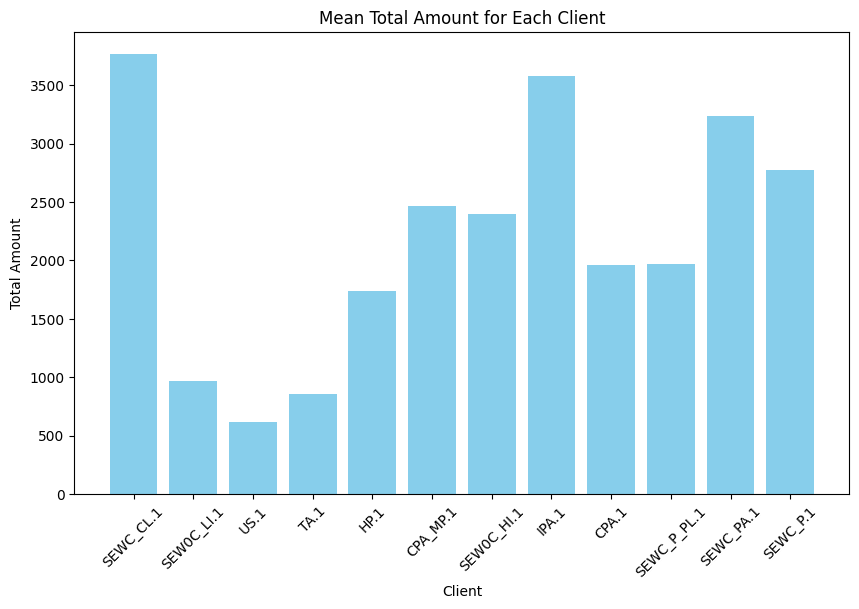

In [17]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(Daily_Summary['Id_compte'], Daily_Summary['total_amount'], color='skyblue')
plt.xlabel('Client')
plt.ylabel('Total Amount')
plt.title('Mean Total Amount for Each Client')
plt.xticks(rotation=45)
plt.show()

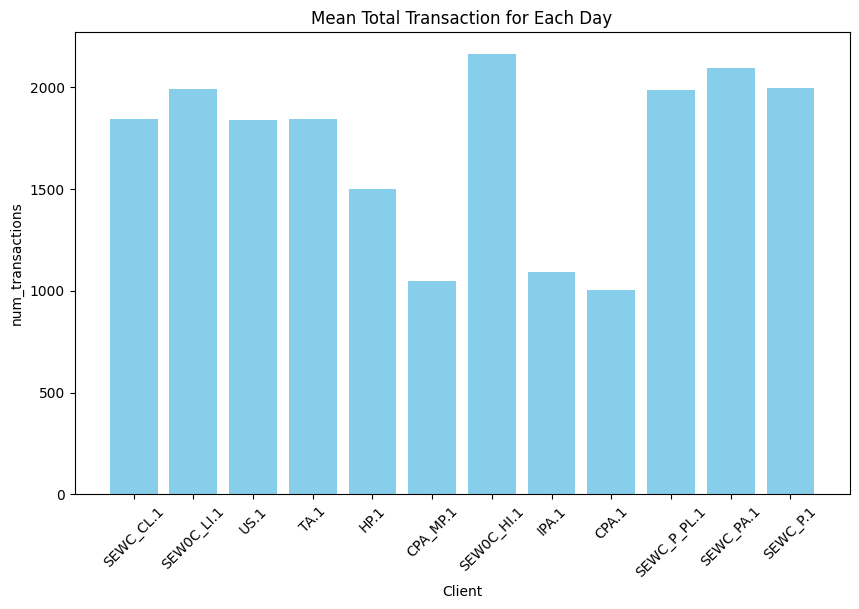

In [18]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(Daily_Summary['Id_compte'], Daily_Summary['total_transactions'], color='skyblue')
plt.xlabel('Client')
plt.ylabel('num_transactions')
plt.title('Mean Total Transaction for Each Day')
plt.xticks(rotation=45)
plt.show()

So, as we can observe, some clients have a large number of transactions in the last 10 months, but the total amount of these transactions is not substantial

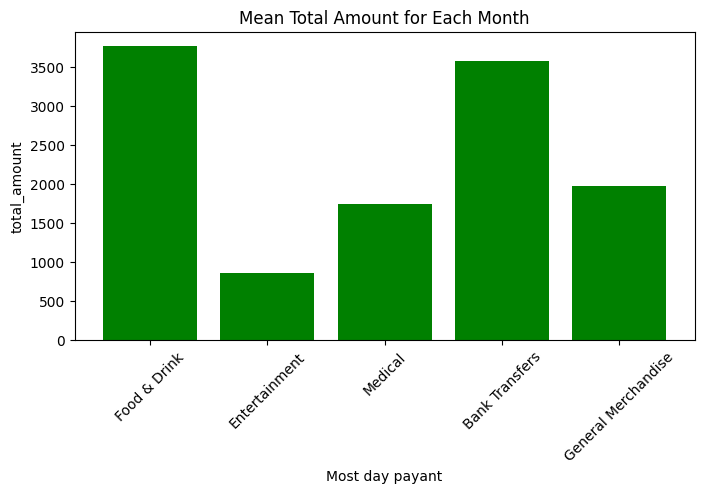

In [19]:
plt.figure(figsize=(8, 4))

# Line plot for transaction counts
plt.bar(Daily_Summary['Most_category_paid'], Daily_Summary['total_amount'], color='green')
plt.title('Day')
plt.xlabel('Most day payant')
plt.ylabel('total_amount')
plt.title('Mean Total Amount for Each Month')
plt.xticks(rotation=45)
plt.show()



# 4. Feature Engineering and Variable Transformation <a class="anchor" id="4-bullet"></a> 


**Before** chosing our features we start by calculate the correlations between all columns and the target column 
We chose Pearson's correlation for numerical (float and int) types and chi2_contingency for categorical (object) types

In [20]:

# Select numeric columns from the DataFrame
Daily_num = Daily_Summary.select_dtypes(include=['float64', 'int64'])

# Calculate Pearson's correlation coefficients for numeric columns
numeric_corr_matrix = Daily_num.corr()

# Select object columns from the DataFrame
Daily_obj = Daily_Summary.select_dtypes(include='object')

# Create a contingency table for each object column and 'total_amount'
for column in Daily_obj.columns:
    contingency_table = pd.crosstab(Daily_Summary[column], Daily_Summary['total_amount'])
    
    # Perform the chi-squared test
    chi2, _, _, _ = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    v = np.sqrt(chi2 / (n * min_dim))

    print(f"{column} correlation: {v}")

# Print Pearson's correlation coefficients for numeric columns
print("Numeric correlations:")
print(numeric_corr_matrix['total_amount'])

Id_compte correlation: 0.9909784047796656
day_of_week correlation: 0.9195878945585539
Most_category_paid correlation: 0.991932641123904
Most_day_paid correlation: 0.9910726843211559
Numeric correlations:
num_transactions_per_day    0.085074
total_compte_amount         0.375310
total_transactions          0.067837
Mean_of_Client              0.377176
total_amount                1.000000
Name: total_amount, dtype: float64


for our model we choose the next columns : 
Id_compte , 
day_of_week , 
Most_category_paid , 
Most_day_paid , 
total_compte_amount , 
Mean_of_Client , 
**because** they have they have correlations grether that 0.5  and **we didn't choose the date because we will base to a new dates 

In [21]:
# we drop the columns of unnecessary features 
Daily_Summary.drop(['num_transactions_per_day','total_transactions','Date'], axis=1, inplace=True)


In [22]:
# Show the new data 
Daily_Summary.head()


,Id_compte,day_of_week,total_compte_amount,Most_category_paid,Mean_of_Client,Most_day_paid,total_amount
0,SEWC_CL.1,Saturday,140239.39,Food & Drink,515.387554,Saturday,983.81
1,SEW0C_LI.1,Saturday,46208.34,Food & Drink,174.895491,Wednesday,19.15
2,US.1,Saturday,34780.31,Food & Drink,133.210707,Sunday,299.30
3,TA.1,Saturday,52536.56,Entertainment,198.791626,Thursday,6.00
4,US.1,Saturday,34780.31,Food & Drink,133.210707,Sunday,299.30


### Feature Encoding

In [23]:
# Encode the label features
most_day=LabelEncoder
le = LabelEncoder()
day = LabelEncoder()
category=LabelEncoder()
most=LabelEncoder()
Daily_Summary['Most_day_paid']=category.fit_transform(Daily_Summary['Most_day_paid'])
Daily_Summary['Most_category_paid']=category.fit_transform(Daily_Summary['Most_category_paid'])
Daily_Summary['day_of_week']=day.fit_transform(Daily_Summary['day_of_week'])
Daily_Summary['Most_day_paid']=day.fit_transform(Daily_Summary['Most_day_paid'])
Daily_Summary['Id_compte'] = le.fit_transform(Daily_Summary['Id_compte'])

Next, let's generate some par plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.

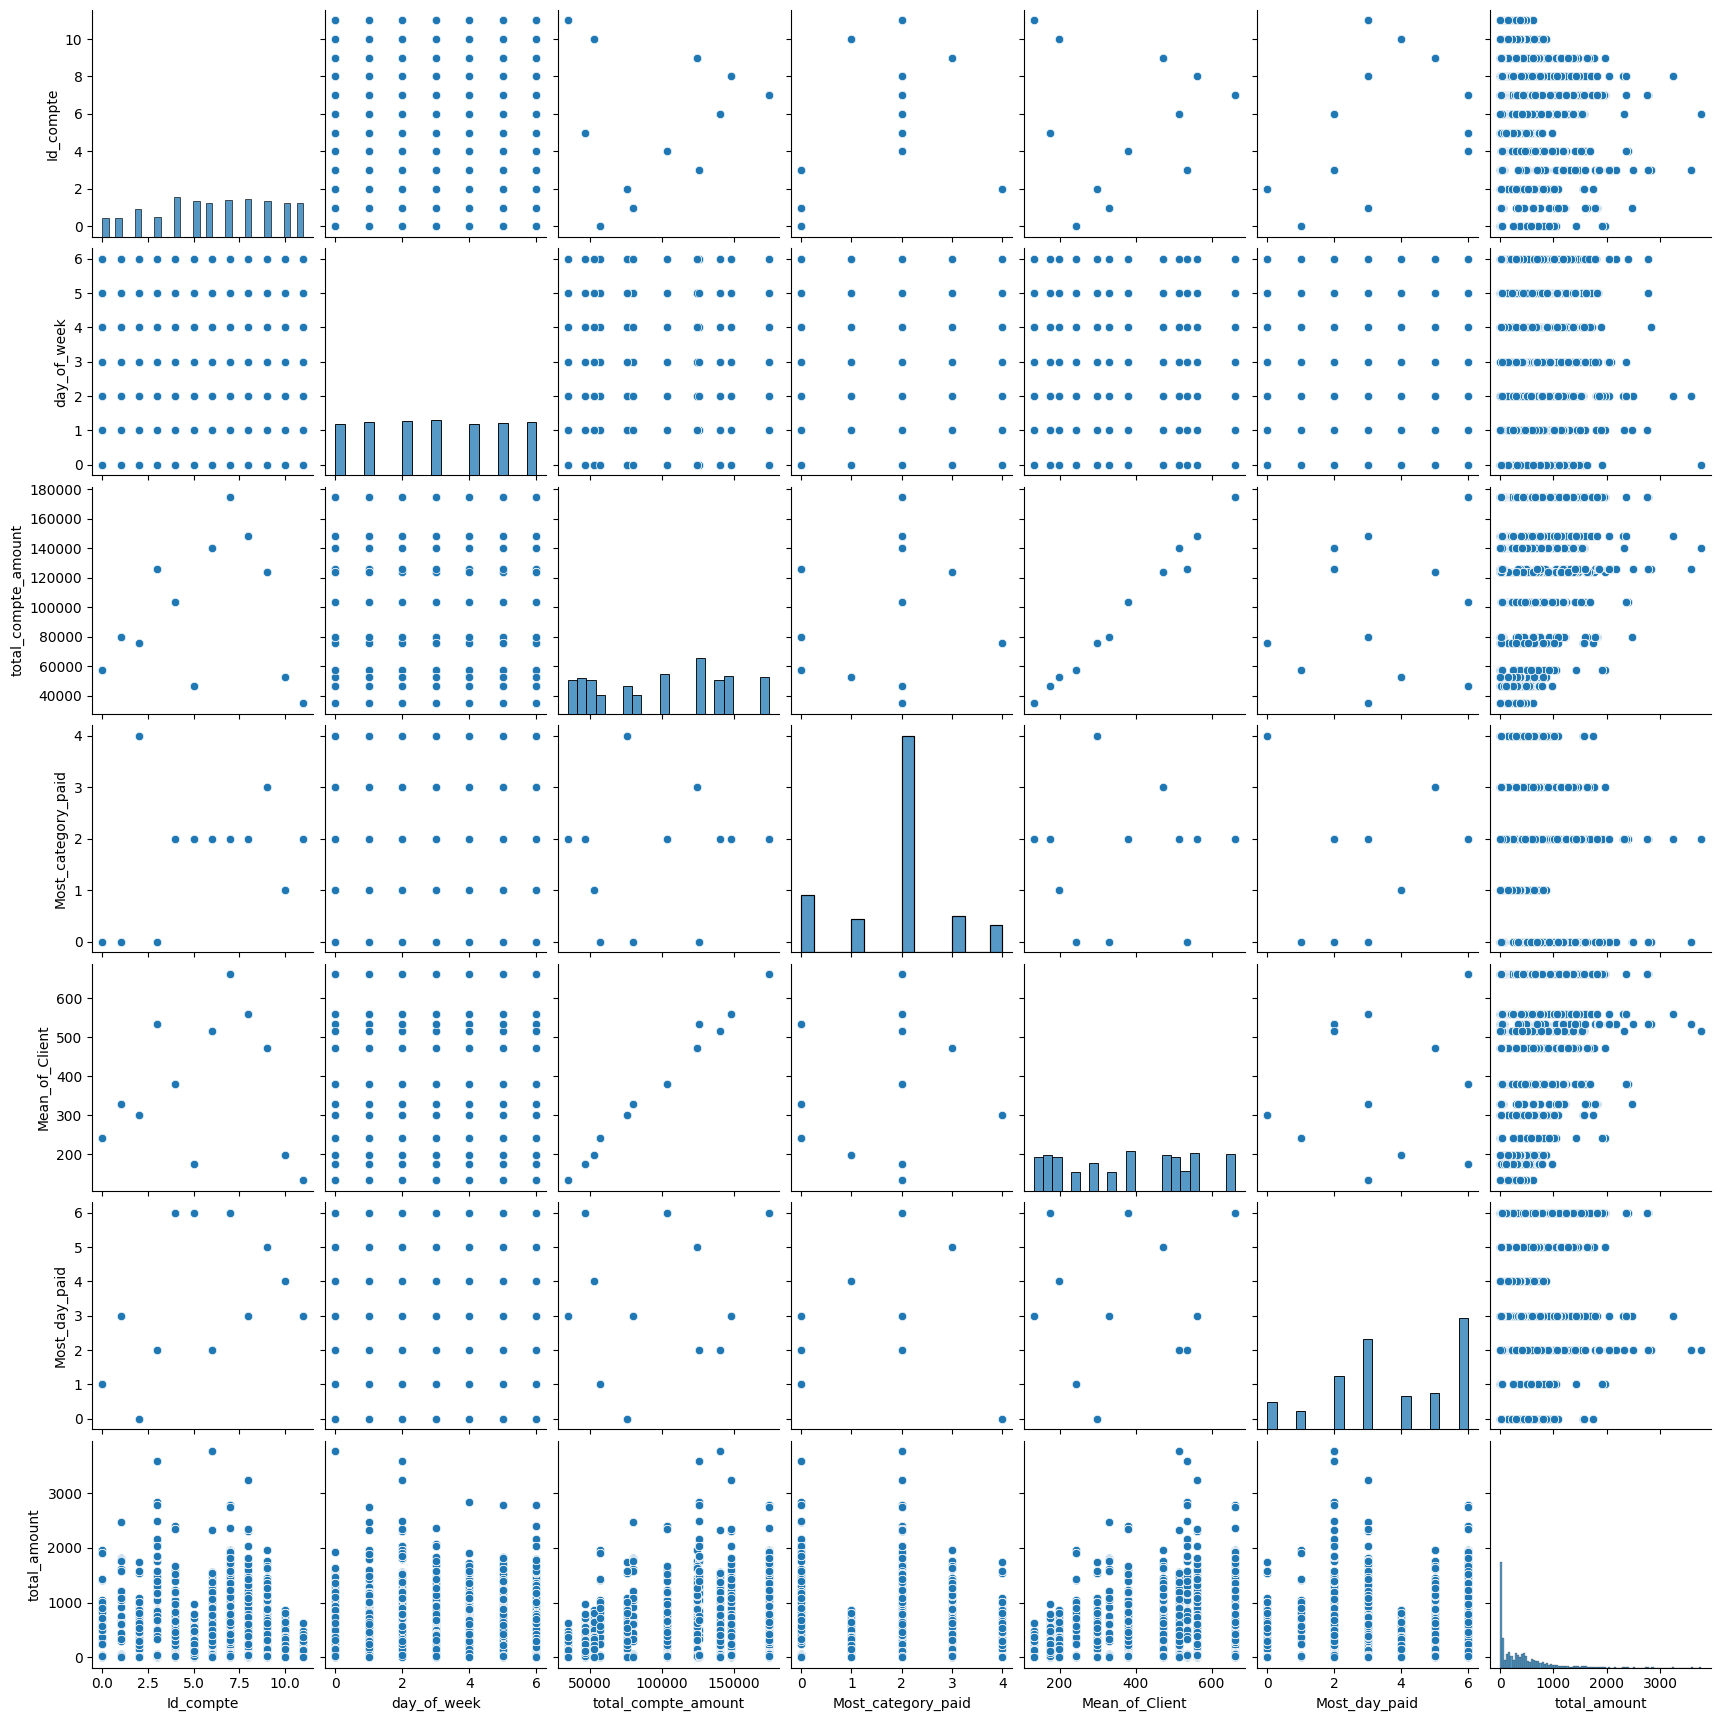

In [24]:
sns.pairplot(Daily_Summary)
plt.show()

In [25]:
#Calculate the skewness of the 'total_amount'
print("Skewness of total amount column : %f" % Daily_Summary['total_amount'].skew())
Daily_Summary['total_amount'].describe()

Skewness of total amount column : 2.036322


count    20411.000000
mean       381.974727
std        451.594885
min          1.120000
25%         32.900000
50%        236.860000
75%        564.360000
max       3764.650000
Name: total_amount, dtype: float64

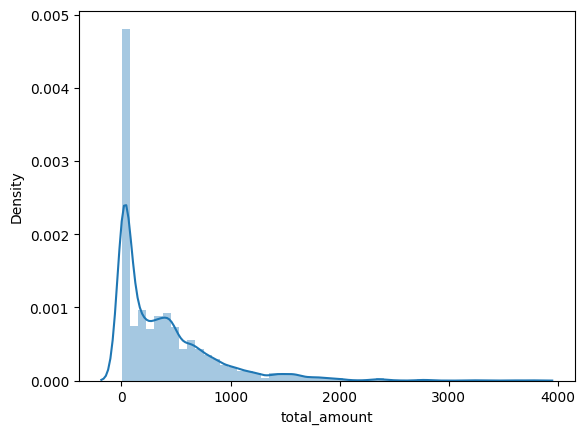

In [26]:
sp_untransformed = sns.distplot(Daily_Summary['total_amount'])

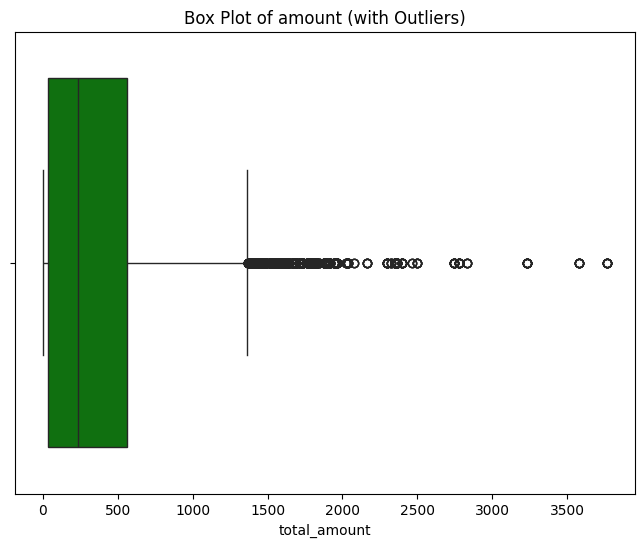

In [27]:
# Looking for outliers
# Plotting the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=Daily_Summary['total_amount'], color='green')
plt.xlabel('total_amount')
plt.title('Box Plot of amount (with Outliers)')
plt.show()

The standard deviation for the total amount is greater than the mean, and the minimum value is not zero. Therefore, we apply a log transformation

 New Skewness of 'total_amount' column : -0.383174


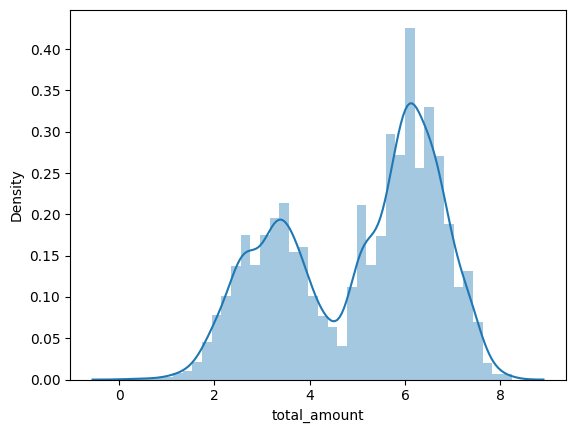

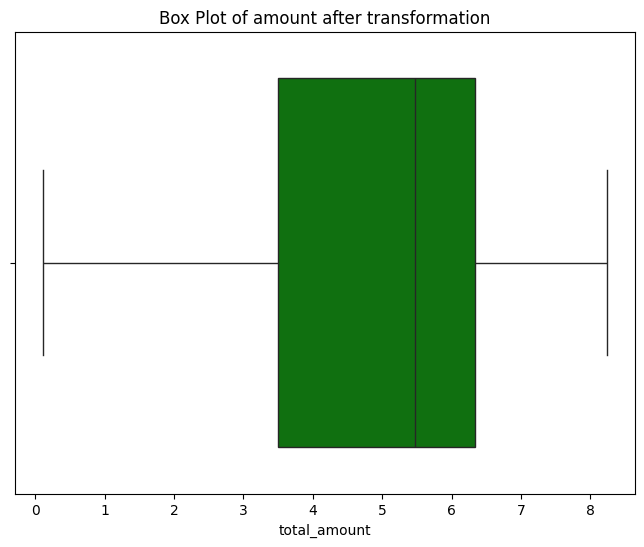

In [28]:
Daily_Summary['total_amount']=np.log(Daily_Summary['total_amount'])
print(" New Skewness of 'total_amount' column : %f" % Daily_Summary['total_amount'].skew())
sp_untransformed = sns.distplot(Daily_Summary['total_amount'])
plt.figure(figsize=(8, 6))
sns.boxplot(x=Daily_Summary['total_amount'], color='green')
plt.xlabel('total_amount')
plt.title('Box Plot of amount after transformation')
plt.show()


In [29]:
#log transformation for Mean_of_Client and total_compte_amount to ensure that the relationships between variables remain consistent.
Daily_Summary['Mean_of_Client']=np.log(Daily_Summary['Mean_of_Client'])
Daily_Summary['total_compte_amount']=np.log(Daily_Summary['total_compte_amount'])

# 5. Model Training <a class="anchor" id="5-bullet"></a> 

In [30]:
features = ['total_compte_amount','Mean_of_Client','Most_day_paid','Id_compte','day_of_week','Most_category_paid'] 
#Create a StandardScaler instance
scaler = StandardScaler()
#Feature Scaling 

X = scaler.fit_transform(Daily_Summary[features])
y = Daily_Summary['total_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
# Instantiate and fit the SVR model
# Define the SVR model
svr = SVR()
svr.fit(X_train, y_train)

#make prediction on the train data 
best_train_predictions = svr.predict(X_train)

# Make predictions on the test set
best_test_predictions = svr.predict(X_test)

# Calculate metrics for the test and train set with the tuned model
best_train_mse = mean_squared_error(y_train, best_train_predictions)
best_train_mae = mean_absolute_error(y_train, best_train_predictions)
best_test_mse = mean_squared_error(y_test, best_test_predictions)
best_test_mae = mean_absolute_error(y_test, best_test_predictions)


# Print metrics
print(f'Training Set - Mean Squared Error: {best_train_mse}, Mean Absolute Error: {best_train_mae}')
print(f'Test Set - Mean Squared Error: {best_test_mse}, Mean Absolute Error: {best_test_mae}')



Training Set - Mean Squared Error: 2.590492978582, Mean Absolute Error: 1.2199083145181249
Test Set - Mean Squared Error: 2.624651721394467, Mean Absolute Error: 1.233582326356913


*Result of GridSearchCV :* 

Best Hyperparameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Training Set - Mean Squared Error: 2.487705685398984, Mean Absolute Error: 1.2528114167540747

Test Set - Mean Squared Error: 2.4926993623885894, Mean Absolute Error: 1.2555964813519647


but I chose the Hyperparameters like that Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'} because the differences between the training set and test set performance are relatively small, and both MSE and MAE are close in value. This suggests that there might be a bit of overfitting, but it doesn't seem to be substantial. The model is performing reasonably well on both the training and test sets.

In [31]:
#Validation data 
prediction_dates = pd.date_range(start='2022-11-08', end='2022-12-31')
prediction_data = pd.DataFrame({
    'Date': np.repeat(prediction_dates, len(le.classes_)),
    'Id_compte': np.tile(le.transform(le.classes_), len(prediction_dates))

})
# Extracting  day for prediction

prediction_data['day_of_week'] = prediction_data['Date'].dt.day_name()
prediction_data['day_of_week']=day.fit_transform(prediction_data['day_of_week'])

prediction_data = pd.merge(prediction_data, Daily_Summary[['total_compte_amount','Mean_of_Client','Id_compte','Most_category_paid','Most_day_paid']].drop_duplicates(), on='Id_compte', how='left')



prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 647
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 648 non-null    datetime64[ns]
 1   Id_compte            648 non-null    int32         
 2   day_of_week          648 non-null    int32         
 3   total_compte_amount  648 non-null    float64       
 4   Mean_of_Client       648 non-null    float64       
 5   Most_category_paid   648 non-null    int32         
 6   Most_day_paid        648 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1)
memory usage: 32.9 KB


# 6. Predictions <a class="anchor" id="6-bullet"></a> 

In [32]:

X_prediction = scaler.fit_transform(prediction_data[['total_compte_amount','Mean_of_Client','Most_day_paid','Id_compte','day_of_week','Most_category_paid']])
# Make predictions using the SVR model
predicted_amounts = svr.predict(X_prediction)

# Add the predicted amounts to the prediction data
prediction_data['Predicted_Amount'] = np.exp(predicted_amounts)

# Create an ID column for output
prediction_data['ID'] = prediction_data['Date'].dt.strftime('%Y-%m-%d') + '_' + le.inverse_transform(prediction_data['Id_compte'])

# Prepare the final output
final_output = prediction_data[['ID', 'Predicted_Amount']]

# Save the final output data to a CSV file
final_output.to_csv('Last_predictions.csv', index=False)